# Задание.
К уроку приложен реальный датасет по когорте пациентов с
одним из наиболее агрессивных раков — с раком
поджелудочной железы.

Препроцессируйте уже анонимизированные данные,
интегрируйте разделы датасета с помощью функций
семейства _join.

Сделайте описательные статистики датасета, не забудьте
посмотреть, что за тип переменных содержится в колонках.

Попробуйте проверить несколько гипотез с помощью
статистических тестов (на качественных переменных) и
сделайте анализ выживаемости.

В каких группах (по каким переменным) выживаемость
отличается?

### Загрузка пакетов

In [ ]:
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
installed.packages('readr')
library(readr)

Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built


In [ ]:
install.packages('survival')
library(survival)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('gtsummary')
library(gtsummary)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘V8’, ‘reactR’, ‘labelled’, ‘bigD’, ‘bitops’, ‘htmlwidgets’, ‘juicyjuice’, ‘markdown’, ‘reactable’, ‘broom.helpers’, ‘gt’


#BlackLivesMatter



In [ ]:
install.packages('tidycmprsk')
library(tidycmprsk)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cmprsk’, ‘hardhat’



Attaching package: ‘tidycmprsk’


The following object is masked from ‘package:gtsummary’:

    trial




In [ ]:
install.packages('condsurv')
#library(condsurv)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘condsurv’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘condSURV’ ?”


In [ ]:
install.packages('lubridate')
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("survminer")
library(survminer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘gridtext’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’


Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




In [ ]:
install.packages('sm')
library(sm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Package 'sm', version 2.2-6.0: type help(sm) for summary information



### Подгрузка датасетов

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clinical.tsv to clinical.tsv
Saving exposure.tsv to exposure.tsv
Saving family_history.tsv to family_history.tsv
Saving follow_up.tsv to follow_up.tsv
Saving pathology_detail.tsv to pathology_detail.tsv


In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
clinical <- read_tsv("/content/clinical.tsv") %>%
  mutate_all(na_if,"\'--")

New names:
• `residual_disease` -> `residual_disease...118`
• `residual_disease` -> `residual_disease...189`
Rows: 1745 Columns: 210
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (210): case_id, case_submitter_id, project_id, age_at_index, age_is_obfu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
exposure <- read_tsv("/content/exposure.tsv") %>%
  mutate_all(na_if,"\'--")

Rows: 401 Columns: 44
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (44): case_id, case_submitter_id, project_id, age_at_last_exposure, age_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
family_history <- read_tsv("/content/family_history.tsv") %>%
  mutate_all(na_if,"\'--")

Rows: 46 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): case_id, case_submitter_id, project_id, relationship_age_at_diagno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
follow_up <- read_tsv("/content/follow_up.tsv") %>%
  mutate_all(na_if,"\'--")

New names:
• `timepoint_category` -> `timepoint_category...78`
• `timepoint_category` -> `timepoint_category...133`
Rows: 306 Columns: 137
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (137): case_id, case_submitter_id, project_id, adverse_event, adverse_ev...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
pathology_detail <- read_tsv("/content/pathology_detail.tsv") %>%
  mutate_all(na_if,"\'--")

Rows: 126 Columns: 77
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (77): case_id, case_submitter_id, project_id, diagnosis_id, diagnosis_su...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Препроцессинг данных

In [ ]:
install.packages("janitor")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’




In [ ]:
library(janitor)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test






---


убираем пустые колонки

In [ ]:
clinical <- remove_empty(clinical, which = c("rows", "cols"), cutoff = 1, quiet = TRUE)

In [ ]:
dim(clinical)

[1] 1745   54

In [ ]:
exposure <- remove_empty(exposure, which = c("rows", "cols"), cutoff = 1, quiet = TRUE)

In [ ]:
dim(exposure)

[1] 401  16

In [ ]:
family_history <- remove_empty(family_history, which = c("rows", "cols"), cutoff = 1, quiet = TRUE)

In [ ]:
dim(family_history)

[1] 46  6

In [ ]:
follow_up <- remove_empty(follow_up, which = c("rows", "cols"), cutoff = 1, quiet = TRUE)

In [ ]:
dim(follow_up)

[1] 306  30

In [ ]:
pathology_detail <- remove_empty(pathology_detail, which = c("rows", "cols"), cutoff = 1, quiet = TRUE)

In [ ]:
dim(pathology_detail)

[1] 126  11



---


делаем единый датасет

In [ ]:
data <- full_join(clinical, exposure, pathology_detail, by = c('case_id', 'case_submitter_id'))

In [ ]:
data <- full_join(data, pathology_detail, follow_up, by = c('case_id', 'case_submitter_id'))

Warning message in full_join(data, pathology_detail, follow_up, by = c("case_id", :
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 202 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [ ]:
dim(data)

[1] 1787   77



---


удаление id колонок

In [ ]:
data <- data %>%
  select(-case_id, -case_submitter_id, -project_id.x, -project_id.y, -project_id, -diagnosis_id, -diagnosis_submitter_id, -pathology_detail_id, -pathology_detail_submitter_id)



---


описание заголовков

In [ ]:
attr(data$age_at_index, "label") <- "Возраст на момент индексации данных"
attr(data$days_to_death, "label") <- "Количество дней до смерти"
attr(data$year_of_birth, "label") <- "Год рождения"
attr(data$year_of_death, "label") <- "Год смерти"
attr(data$age_at_diagnosis, "label") <- "Возраст на момент диагностики"
attr(data$days_to_diagnosis, "label") <- "Дни до диагностики"
attr(data$days_to_last_follow_up, "label") <- "Дни до последнего наблюдения"




---

перевод в factor и numeric

In [ ]:
data <- data %>%
    mutate(age_is_obfuscated = as.factor(age_is_obfuscated)) %>%
    mutate(cause_of_death = as.factor(cause_of_death)) %>%
    mutate(ethnicity = as.factor(ethnicity)) %>%
    mutate(gender = as.factor(gender)) %>%
    mutate(race = as.factor(race)) %>%
    mutate(vital_status = as.factor(vital_status)) %>%
    mutate(ajcc_clinical_m = as.factor(ajcc_clinical_m)) %>%
    mutate(ajcc_clinical_stage = as.factor(ajcc_clinical_stage)) %>%
    mutate(ajcc_pathologic_m = as.factor(ajcc_pathologic_m)) %>%
    mutate(ajcc_pathologic_n = as.factor(ajcc_pathologic_n)) %>%
    mutate(ajcc_pathologic_stage = as.factor(ajcc_pathologic_stage)) %>%
    mutate(ajcc_pathologic_t = as.factor(ajcc_pathologic_t)) %>%
    mutate(ajcc_staging_system_edition = as.factor(ajcc_staging_system_edition)) %>%
    mutate(best_overall_response = as.factor(best_overall_response)) %>%
    mutate(classification_of_tumor = as.factor(classification_of_tumor)) %>%
    mutate(icd_10_code = as.factor(icd_10_code)) %>%
    mutate(last_known_disease_status = as.factor(last_known_disease_status)) %>%
    mutate(metastasis_at_diagnosis = as.factor(metastasis_at_diagnosis)) %>%
    mutate(morphology = as.factor(morphology)) %>%
    mutate(primary_diagnosis = as.factor(primary_diagnosis)) %>%
    mutate(prior_malignancy = as.factor(prior_malignancy)) %>%
    mutate(prior_treatment = as.factor(prior_treatment)) %>%
    mutate(progression_or_recurrence = as.factor(progression_or_recurrence)) %>%
    mutate(residual_disease...118 = as.factor(residual_disease...118)) %>%
    mutate(site_of_resection_or_biopsy = as.factor(site_of_resection_or_biopsy)) %>%
    mutate(synchronous_malignancy = as.factor(synchronous_malignancy)) %>%
    mutate(tissue_or_organ_of_origin = as.factor(tissue_or_organ_of_origin)) %>%
    mutate(tumor_focality = as.factor(tumor_focality)) %>%
    mutate(tumor_grade = as.factor(tumor_grade)) %>%
    mutate(initial_disease_status = as.factor(initial_disease_status)) %>%
    mutate(regimen_or_line_of_therapy = as.factor(regimen_or_line_of_therapy)) %>%
    mutate(residual_disease...189 = as.factor(residual_disease...189)) %>%
    mutate(therapeutic_agents = as.factor(therapeutic_agents)) %>%
    mutate(treatment_intent_type = as.factor(treatment_intent_type)) %>%
    mutate(treatment_or_therapy = as.factor(treatment_or_therapy)) %>%
    mutate(treatment_outcome = as.factor(treatment_outcome)) %>%
    mutate(treatment_type = as.factor(treatment_type)) %>%
    mutate(alcohol_history = as.factor(alcohol_history)) %>%
    mutate(alcohol_intensity = as.factor(alcohol_intensity)) %>%
    mutate(exposure_type = as.factor(exposure_type)) %>%
    mutate(secondhand_smoke_as_child = as.factor(secondhand_smoke_as_child)) %>%
    mutate(tobacco_smoking_status = as.factor(tobacco_smoking_status)) %>%
    mutate(type_of_smoke_exposure = as.factor(type_of_smoke_exposure)) %>%
    mutate(lymph_nodes_positive = as.factor(lymph_nodes_positive)) %>%
    mutate(peripancreatic_lymph_nodes_positive = as.factor(peripancreatic_lymph_nodes_positive))


In [ ]:
data <- data %>%
    mutate(age_at_index = as.numeric(age_at_index)) %>%
    mutate(days_to_birth = as.numeric(days_to_birth)) %>%
    mutate(days_to_death = as.numeric(days_to_death)) %>%
    mutate(year_of_birth = as.numeric(year_of_birth)) %>%
    mutate(year_of_death = as.numeric(year_of_death)) %>%
    mutate(age_at_diagnosis = as.numeric(age_at_diagnosis)) %>%
    mutate(days_to_best_overall_response = as.numeric(days_to_best_overall_response)) %>%
    mutate(days_to_diagnosis = as.numeric(days_to_diagnosis)) %>%
    mutate(days_to_last_follow_up = as.numeric(days_to_last_follow_up)) %>%
    mutate(days_to_last_known_disease_status = as.numeric(days_to_last_known_disease_status)) %>%
    mutate(days_to_recurrence = as.numeric(days_to_recurrence)) %>%
    mutate(year_of_diagnosis = as.numeric(year_of_diagnosis)) %>%
    mutate(days_to_treatment_end = as.numeric(days_to_treatment_end)) %>%
    mutate(days_to_treatment_start = as.numeric(days_to_treatment_start)) %>%
    mutate(alcohol_days_per_week = as.numeric(alcohol_days_per_week)) %>%
    mutate(cigarettes_per_day = as.numeric(cigarettes_per_day)) %>%
    mutate(exposure_duration_years = as.numeric(exposure_duration_years)) %>%
    mutate(pack_years_smoked = as.numeric(pack_years_smoked)) %>%
    mutate(tobacco_smoking_onset_year = as.numeric(tobacco_smoking_onset_year)) %>%
    mutate(tobacco_smoking_quit_year = as.numeric(tobacco_smoking_quit_year)) %>%
    mutate(years_smoked = as.numeric(years_smoked)) %>%
    mutate(peripancreatic_lymph_nodes_tested = as.numeric(peripancreatic_lymph_nodes_tested)) %>%
    mutate(tumor_largest_dimension_diameter = as.numeric(tumor_largest_dimension_diameter))


In [ ]:
str(data)

tibble [1,787 × 68] (S3: tbl_df/tbl/data.frame)
 $ age_at_index                       : num [1:1787] NA NA NA NA NA NA 53 53 NA NA ...
 $ age_is_obfuscated                  : Factor w/ 1 level "false": NA NA NA NA NA NA NA NA NA NA ...
 $ cause_of_death                     : Factor w/ 7 levels "Cancer Related",..: NA NA NA NA NA NA NA NA NA NA ...
 $ days_to_birth                      : num [1:1787] NA NA NA NA NA ...
 $ days_to_death                      : num [1:1787] NA NA NA NA NA NA 486 486 NA NA ...
 $ ethnicity                          : Factor w/ 4 levels "hispanic or latino",..: 3 3 3 3 3 3 2 2 3 2 ...
 $ gender                             : Factor w/ 4 levels "female","male",..: 1 2 1 1 1 1 1 1 2 1 ...
 $ race                               : Factor w/ 6 levels "asian","black or african american",..: 3 3 3 3 3 3 6 6 3 6 ...
 $ vital_status                       : Factor w/ 4 levels "Alive","Dead",..: 3 3 3 3 3 3 2 2 3 3 ...
 $ year_of_birth                      : num [1:1787] 

In [ ]:
install.packages('writexl')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(writexl)

In [ ]:
write_rds(data, "data.rds")

# Описательная статистика

In [ ]:
install.packages('skimr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(skimr)

In [ ]:
# по категориальным переменным
skimr::skim(select(data, where(is.factor)))

── Data Summary ────────────────────────
                           Values                      
Name                       select(data, where(is.fac...
Number of rows             1787                        
Number of columns          45                          
_______________________                                
Column type frequency:                                 
  factor                   45                          
________________________                               
Group variables            None                        

── Variable type: factor ───────────────────────────────────────────────────────
   skim_variable                       n_missing complete_rate ordered n_unique
 1 age_is_obfuscated                        1339       0.251   FALSE          1
 2 cause_of_death                           1397       0.218   FALSE          7
 3 ethnicity                                   0       1       FALSE          4
 4 gender                                      0     

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 7' in coercion to 'logical(1)'


In [ ]:
# удаление неинформативных колонок
data <- data %>%
  select(-age_is_obfuscated, -synchronous_malignancy, -treatment_outcome, -exposure_type, -secondhand_smoke_as_child, -type_of_smoke_exposure)

In [ ]:
# по количественным переменным
skimr::skim(select(data, where(is.numeric)))

── Data Summary ────────────────────────
                           Values                      
Name                       select(data, where(is.num...
Number of rows             1787                        
Number of columns          23                          
_______________________                                
Column type frequency:                                 
  numeric                  23                          
________________________                               
Group variables            None                        

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable                     n_missing complete_rate       mean      sd
 1 age_at_index                           1417       0.207       64.9     11.0 
 2 days_to_birth                           808       0.548   -24093.    3528.  
 3 days_to_death                          1222       0.316      466.     329.  
 4 year_of_birth                           804       

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 12' in coercion to 'logical(1)'


In [ ]:
install.packages("ggcorrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’




In [ ]:
library(ggcorrplot)


In [ ]:
data_corr <- data[lapply(data,class)!="factor"]

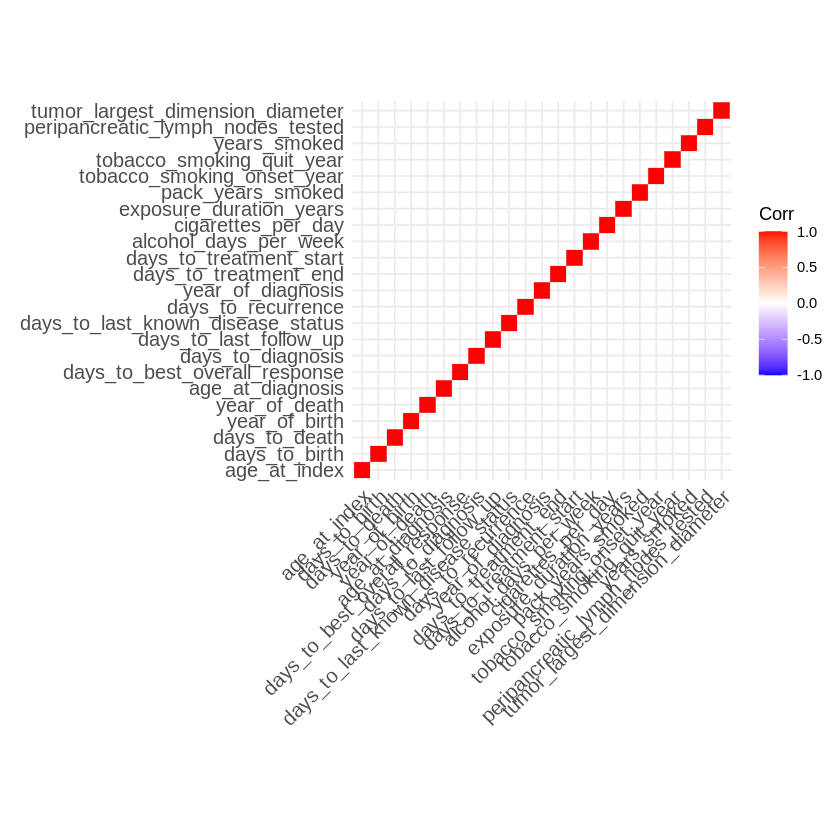

In [ ]:
ggcorrplot(cor(data_corr)) # корреляционная матрица не показывает зависимости, т.к. много пропущенных значений

### Группировки

In [ ]:
install.packages('psych')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’




In [ ]:
library(psych)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [ ]:
# группировка количества дней до смерти по диагнозу
primary_diagnosis_group_days_to_death <- data %>%
  group_by(primary_diagnosis) %>%
  summarise(psych::describe(days_to_death))

Warning message:
“There were 14 warnings in `summarise()`.
The first warning was:
ℹ In argument: `psych::describe(days_to_death)`.
ℹ In group 1: `primary_diagnosis = "Acinar cell carcinoma"`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 13 remaining warnings.”


In [ ]:
primary_diagnosis_group_days_to_death

primary_diagnosis,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Acinar cell carcinoma,1,0,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
Adenocarcinoma with mixed subtypes,1,2,466.0000,0.00000,466,466.0000,0.0000,466,466,0,NaN,NaN,0.000000
"Adenocarcinoma, metastatic, NOS",1,6,227.0000,0.00000,227,227.0000,0.0000,227,227,0,NaN,NaN,0.000000
"Adenocarcinoma, NOS",1,139,452.6403,192.01147,425,444.8230,197.1858,91,781,690,0.4284334,-1.040174,16.286201
"Carcinoma, NOS",1,0,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
"Carcinoma, undifferentiated, NOS",1,0,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
"Duct adenocarcinoma, NOS",1,1,2441.0000,NA,2441,2441.0000,0.0000,2441,2441,0,NA,NA,NA
"Infiltrating duct carcinoma, NOS",1,379,492.3325,360.44847,446,440.7344,281.6940,1,2182,2181,1.7664638,4.449705,18.514994
"Intraductal papillary-mucinous carcinoma, invasive",1,2,526.0000,0.00000,526,526.0000,0.0000,526,526,0,NaN,NaN,0.000000


In [ ]:
# группировка диаметра опухоли по статусу жизни
vital_status_group_tumor_largest_dimension_diameter <- data %>%
  group_by(vital_status) %>%
  summarise(psych::describe(tumor_largest_dimension_diameter))

Warning message:
“There were 2 warnings in `summarise()`.
The first warning was:
ℹ In argument: `psych::describe(tumor_largest_dimension_diameter)`.
ℹ In group 4: `vital_status = Unknown`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


In [ ]:
vital_status_group_tumor_largest_dimension_diameter

vital_status,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alive,1,16,3.662500,1.457795,3.55,3.60000,1.40847,1.2,7,5.8,0.3115473,-0.2679322,0.3644488
Dead,1,72,4.541667,2.862912,3.50,4.02069,1.48260,0.9,14,13.1,1.6676595,2.1652965,0.3373975
Not Reported,1,1,3.000000,NA,3.00,3.00000,0.00000,3.0,3,0.0,NA,NA,NA
Unknown,1,0,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA


In [ ]:
# группировка количества дней до смерти по виду опухоли
tumor_grade_group_days_to_death <- data %>%
  group_by(tumor_grade) %>%
  summarise(psych::describe(days_to_death))

Warning message:
“There were 2 warnings in `summarise()`.
The first warning was:
ℹ In argument: `psych::describe(days_to_death)`.
ℹ In group 7: `tumor_grade = Unknown`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


In [ ]:
tumor_grade_group_days_to_death

tumor_grade,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
G1,1,10,690.5000,482.3487,656.5,669.2500,496.6710,70,1481,1411,0.3051838,-1.391863,152.53205
G2,1,195,466.4000,319.8507,427.0,422.6497,262.4202,11,1874,1863,1.5389451,3.063118,22.90498
G3,1,61,379.2951,285.3725,292.0,333.0204,83.0256,1,1590,1589,2.0740866,5.004937,36.53820
G4,1,1,300.0000,NA,300.0,300.0000,0.0000,300,300,0,NA,NA,NA
GX,1,14,481.0000,111.4409,388.0,478.4167,0.0000,388,605,217,0.2583047,-2.065901,29.78384
Not Reported,1,200,459.2700,361.7681,394.0,405.4625,278.7288,12,2182,2170,2.2775669,7.339182,25.58087
Unknown,1,0,NaN,NA,NA,NaN,NA,Inf,-Inf,-Inf,NA,NA,NA
NA,1,84,516.3095,285.1021,425.0,492.8529,195.7032,227,2441,2214,3.6262293,22.012888,31.10719


### Гистограммы распределений

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1529 rows containing non-finite outside the scale range (`stat_bin()`).”


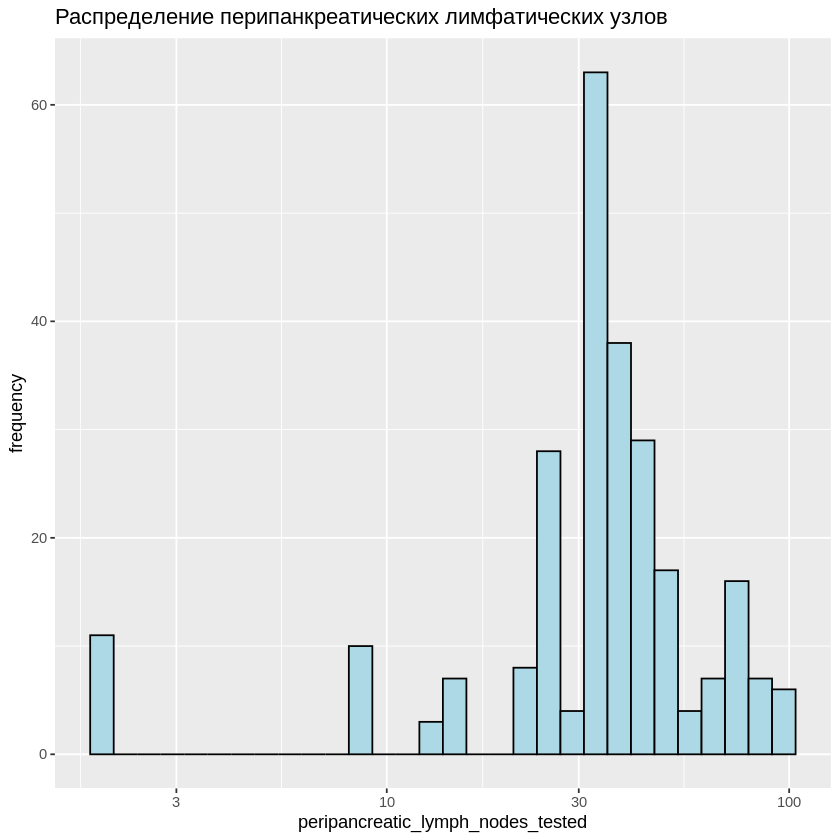

In [ ]:
ggplot(data, aes(peripancreatic_lymph_nodes_tested)) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение перипанкреатических лимфатических узлов") +
  scale_x_log10(name = "peripancreatic_lymph_nodes_tested") +
  scale_y_continuous(name = "frequency")
# нормальное распределение

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1743 rows containing non-finite outside the scale range (`stat_bin()`).”


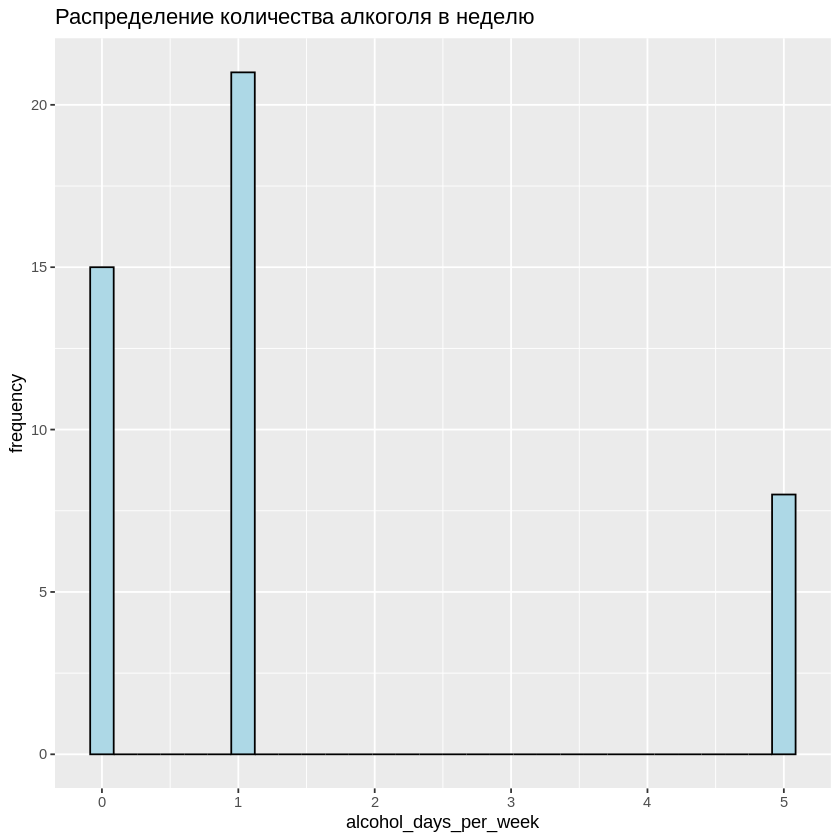

In [ ]:
ggplot(data, aes(alcohol_days_per_week)) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение количества алкоголя в неделю") +
  scale_y_continuous(name = "frequency")
# биномиальное распределение

Warning message in scale_x_log10(name = "days_to_death"):
“log-10 transformation introduced infinite values.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1223 rows containing non-finite outside the scale range (`stat_bin()`).”


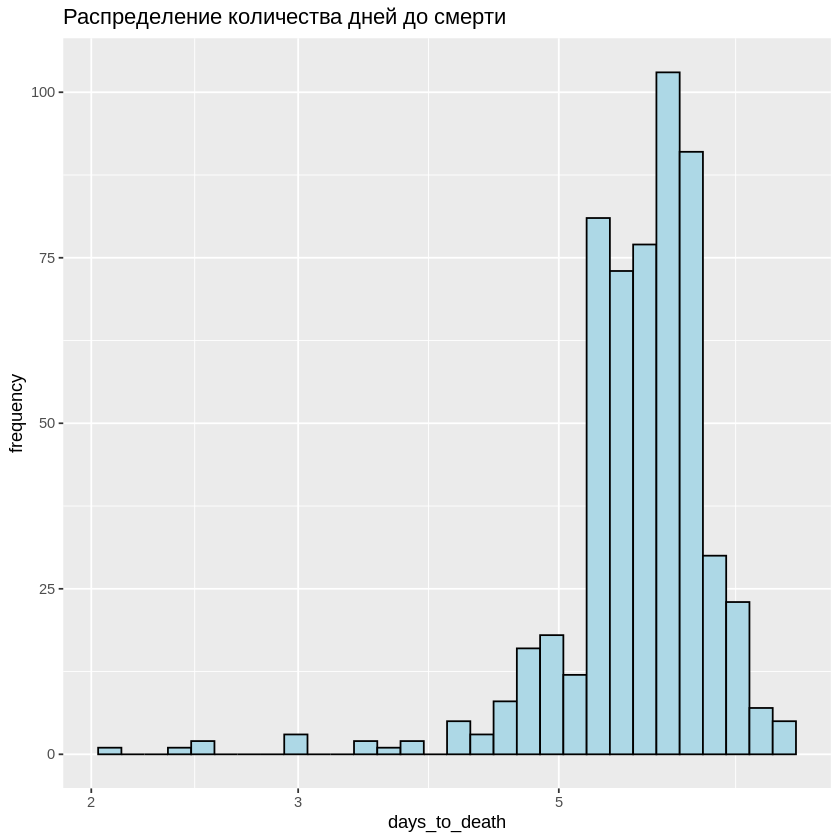

In [ ]:
ggplot(data, aes(log(days_to_death))) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение количества дней до смерти") +
  scale_x_log10(name = "days_to_death") +
  scale_y_continuous(name = "frequency")
# асимметричное распределение (Бета-распределение)

Warning message in scale_x_log10(name = "days_to_last_follow_up"):
“log-10 transformation introduced infinite values.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 554 rows containing non-finite outside the scale range (`stat_bin()`).”


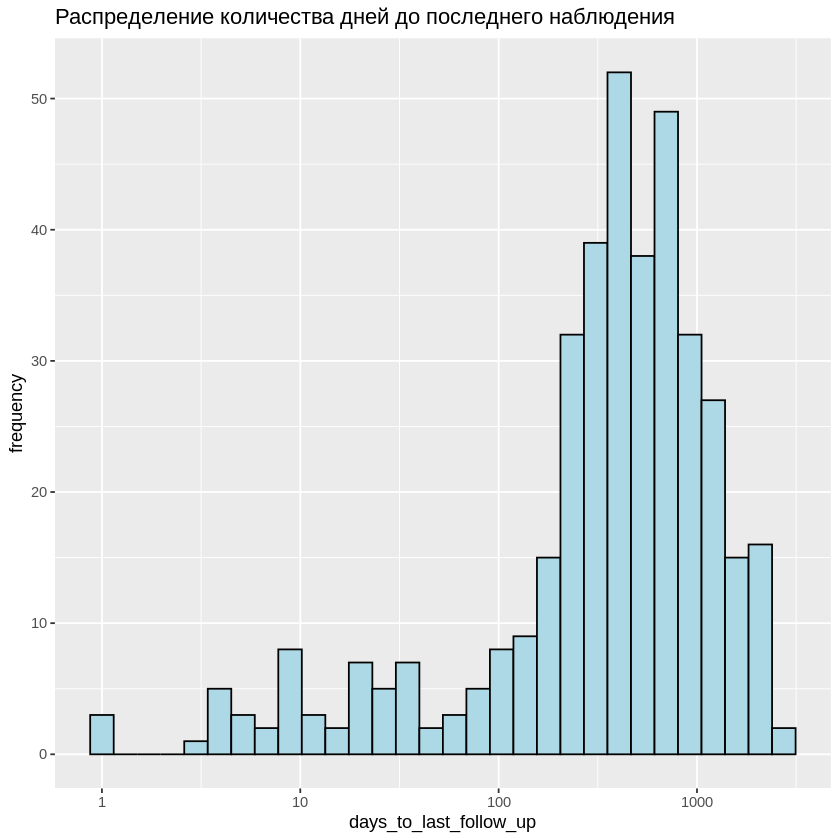

In [ ]:
ggplot(data, aes(days_to_last_follow_up)) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение количества дней до последнего наблюдения") +
  scale_x_log10(name = "days_to_last_follow_up") +
  scale_y_continuous(name = "frequency")
# асимметричное распределение (Бета-распределение)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_bin()`).”


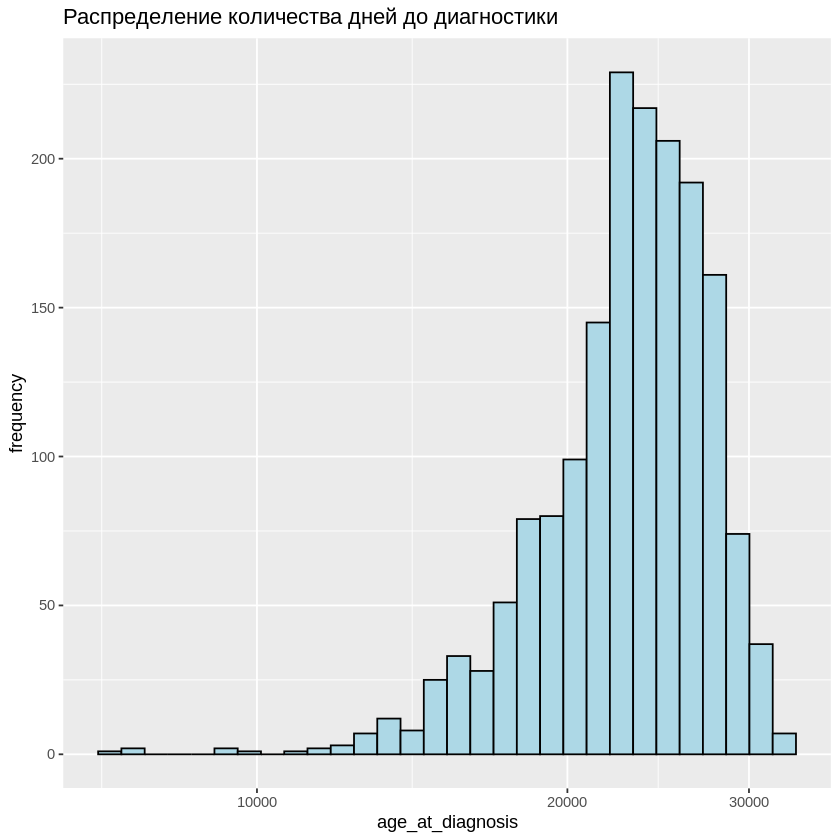

In [ ]:
ggplot(data, aes(age_at_diagnosis)) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение количества дней до диагностики") +
  scale_x_log10(name = "age_at_diagnosis") +
  scale_y_continuous(name = "frequency")
# асимметричное распределение (Бета-распределение)

### Типы переменных

В датасете есть два типа переменных: количественные (дискретные), категориальные (факторы).

In [ ]:
str(data)

tibble [1,787 × 62] (S3: tbl_df/tbl/data.frame)
 $ age_at_index                       : num [1:1787] NA NA NA NA NA NA 53 53 NA NA ...
 $ cause_of_death                     : Factor w/ 7 levels "Cancer Related",..: NA NA NA NA NA NA NA NA NA NA ...
 $ days_to_birth                      : num [1:1787] NA NA NA NA NA ...
 $ days_to_death                      : num [1:1787] NA NA NA NA NA NA 486 486 NA NA ...
 $ ethnicity                          : Factor w/ 4 levels "hispanic or latino",..: 3 3 3 3 3 3 2 2 3 2 ...
 $ gender                             : Factor w/ 4 levels "female","male",..: 1 2 1 1 1 1 1 1 2 1 ...
 $ race                               : Factor w/ 6 levels "asian","black or african american",..: 3 3 3 3 3 3 6 6 3 6 ...
 $ vital_status                       : Factor w/ 4 levels "Alive","Dead",..: 3 3 3 3 3 3 2 2 3 3 ...
 $ year_of_birth                      : num [1:1787] NA NA NA NA NA ...
 $ year_of_death                      : num [1:1787] NA NA NA NA NA ...
 $ age_at_

# Статистические тесты

## Тест Пирсона

In [ ]:
cor.test(data$tumor_largest_dimension_diameter, data$days_to_recurrence)


	Pearson's product-moment correlation

data:  data$tumor_largest_dimension_diameter and data$days_to_recurrence
t = 1.5724, df = 17, p-value = 0.1343
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1167700  0.6976343
sample estimates:
      cor 
0.3563388 


линейная зависимость между диаметром опухоли и количеством дней до рецидива слабая

In [ ]:
cor.test(data$days_to_birth, data$age_at_diagnosis)



	Pearson's product-moment correlation

data:  data$days_to_birth and data$age_at_diagnosis
t = -20793, df = 939, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9999990 -0.9999988
sample estimates:
       cor 
-0.9999989 


линейная зависимость между количеством дней до смерти и возрастом при диагностики сильная отрицательная

## Хи-квадрат

Эмпирическая гипотеза: влияет ли пол пациента на источник опухоли?

Н0 - пол не влияет на источник опухоли.

Н1 - пол влияет на источник опухоли.

ЗП - категориальная

НП - категориальная

In [ ]:
# таблица сопряженности
ctable <- data %>%
  dplyr::select(tissue_or_organ_of_origin, gender) %>%
  table()
ctable

                                gender
tissue_or_organ_of_origin        female male unknown unspecified
  Body of pancreas                   21   24       0           0
  Breast, NOS                         1    0       0           0
  Head of pancreas                  179  219       0           0
  Not Reported                        0    2       0           0
  Overlapping lesion of pancreas      2    2       0           0
  Pancreas, NOS                     637  661       1           1
  Tail of pancreas                   18   19       0           0

In [ ]:
wilcox.test(ctable, exact = TRUE, paired = FALSE)

Warning message in wilcox.test.default(ctable, exact = TRUE, paired = FALSE):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(ctable, exact = TRUE, paired = FALSE):
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank test with continuity correction

data:  ctable
V = 105, p-value = 0.001072
alternative hypothesis: true location is not equal to 0


p-value низкий, отвергает нулевую гипотезу

In [ ]:
# таблица сопряженности
ctable <- data %>%
  dplyr::select(ajcc_pathologic_stage, gender) %>%
  table()
ctable

                     gender
ajcc_pathologic_stage female male unknown unspecified
         Not Reported      1    4       0           0
         Stage I           2    1       0           0
         Stage IA          5    8       0           0
         Stage IB         24   31       0           0
         Stage IIA        28   64       0           1
         Stage IIB       215  193       0           0
         Stage III       102  112       0           0
         Stage IIIB        1    0       0           0
         Stage IV         76   58       0           0

In [ ]:
wilcox.test(ctable, exact = TRUE, paired = FALSE)

Warning message in wilcox.test.default(ctable, exact = TRUE, paired = FALSE):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(ctable, exact = TRUE, paired = FALSE):
“cannot compute exact p-value with zeroes”



	Wilcoxon signed rank test with continuity correction

data:  ctable
V = 171, p-value = 0.0002104
alternative hypothesis: true location is not equal to 0


p-value низкий -> пол влияет на стадию опухоли

## Однофакторная ANOVA

Гипотеза: влияет ли количество лет курения на лимфатические узлы?

H0 - количество лет курения не влияет на лимфатические узлы

H1 - количество лет курения влияет на лимфатические узлы

ЗП - количество лет курения (pack_years_smoked), количественная, непрерывная

НП - измененные лимфатические узлы (lymph_nodes_positive), категориальная, дискретная

Выборки независимые.

In [ ]:
model <- aov(pack_years_smoked ~ lymph_nodes_positive, data = data)
summary(model)

                     Df Sum Sq Mean Sq F value Pr(>F)
lymph_nodes_positive  5   2519   503.8   1.171   0.36
Residuals            19   8176   430.3               
1762 observations deleted due to missingness

значимых связей нет => количество лет курения не влияет на лимфатические узлы

Warning message:
“not plotting observations with leverage one:
  23”


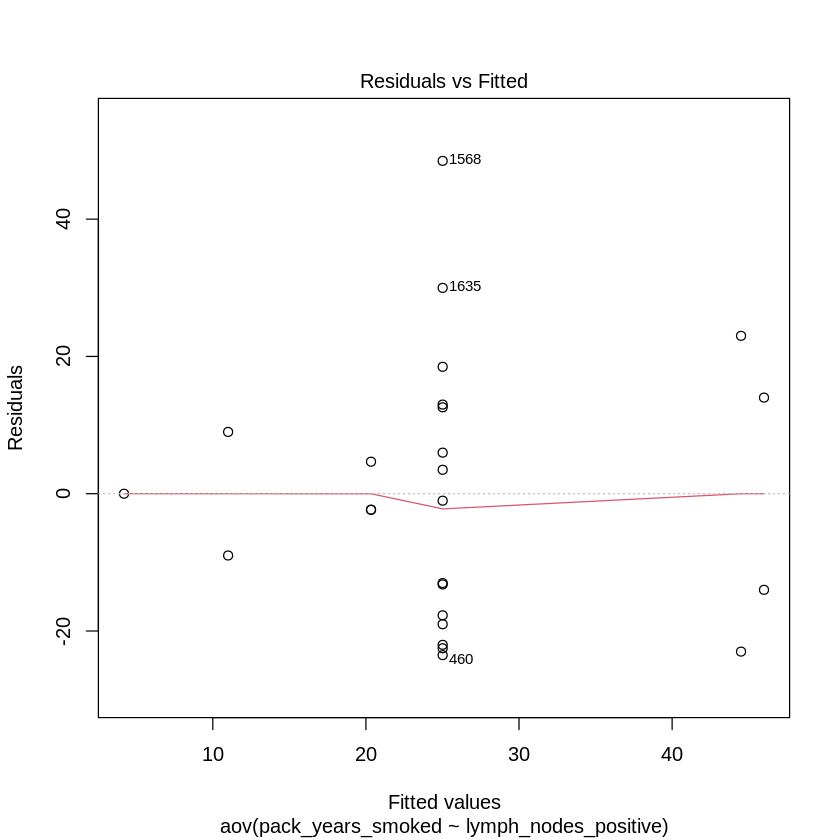

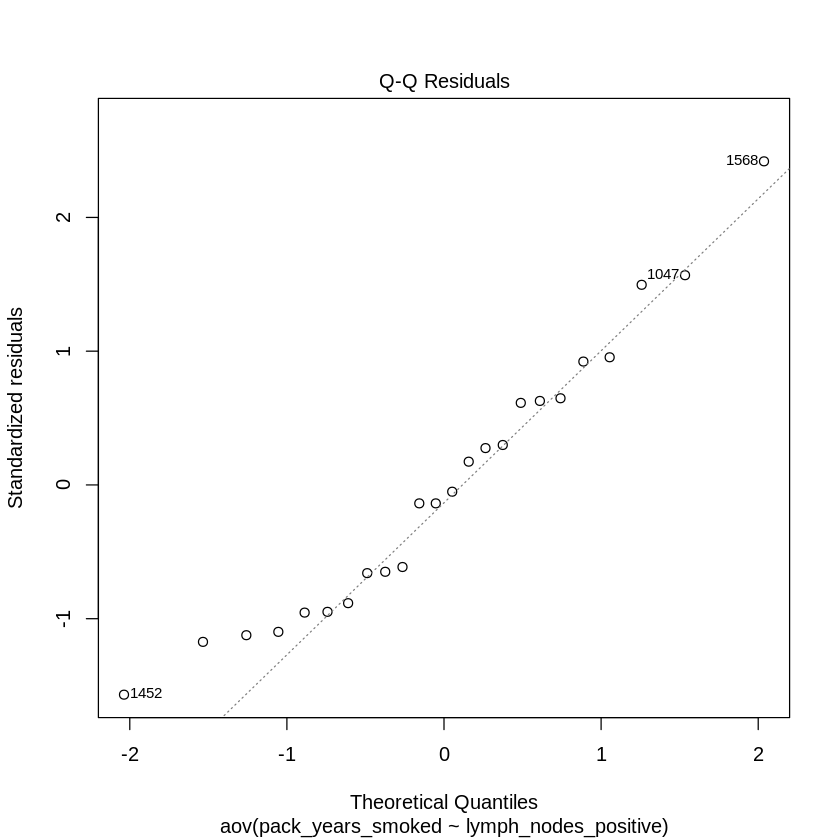

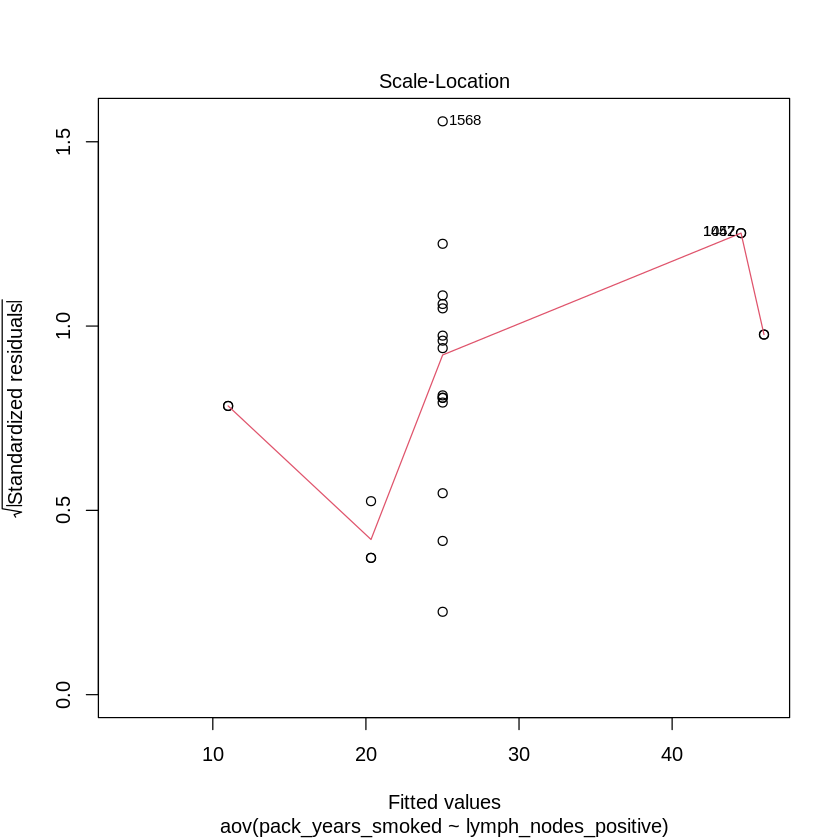

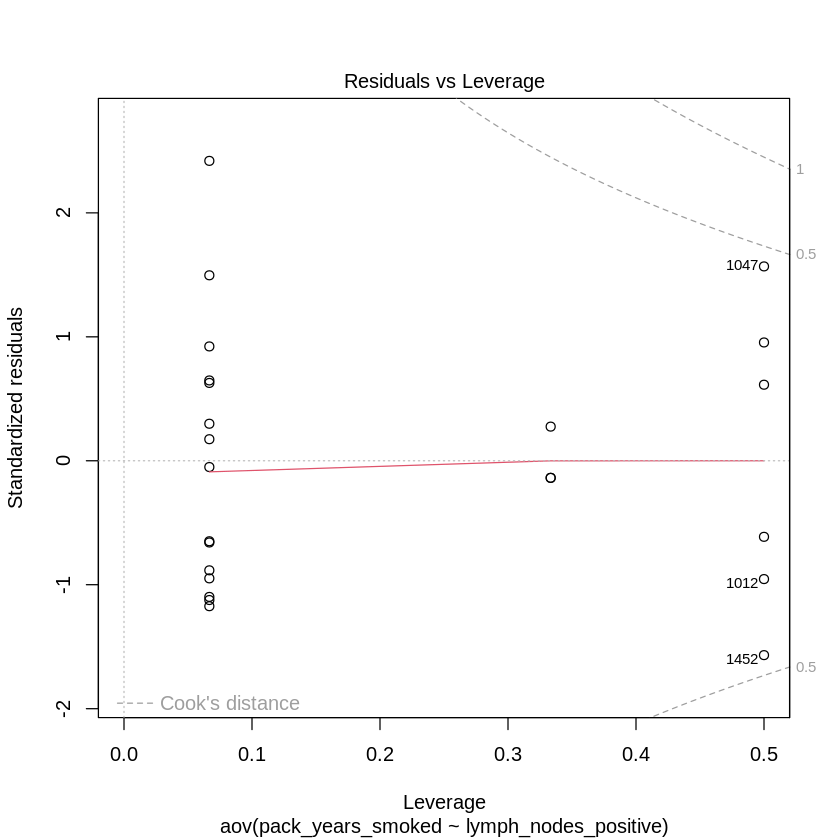

In [ ]:
plot(model)

на Residuals vs Fitted симметричность относительно нижней и верхней части графика, разброс примерно одинаковый слева и справа

на qqplot остатки распределены нормально

на Scale-Location plot выбросы есть, гетероскедастичность остатков

на Residuals vs Leverage есть высокие точки и низкие точки по Y, которые могут поменять направление регрессии

## ANCOVA

НП - progression_or_recurrence (прогрессирование или рецидив)

ЗП - days_to_death (дни до смерти)

Ковариата - years_smoked (количество лет курения)

In [ ]:
model <- aov(days_to_death ~ progression_or_recurrence * years_smoked, data = data)
summary(model)

                                       Df  Sum Sq Mean Sq F value  Pr(>F)   
progression_or_recurrence               2 1973405  986702   5.878 0.00486 **
years_smoked                            1    1036    1036   0.006 0.93768   
progression_or_recurrence:years_smoked  2 1233788  616894   3.675 0.03176 * 
Residuals                              55 9232272  167859                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
1726 observations deleted due to missingness

Как в группах по прогрессированию опухоли количество лет курения влияет на количество дней до смерти?

Прогрессирование влияет на количество дней до смерти.

Количество лет курения не влияет на количество дней до смерти.

При взаимодействии прогрессирования и лет курения взаимодействие с количеством дней до смерти есть.

## MANOVA

ЗП - days_to_death

ЗП - tumor_largest_dimension_diameter

НП - tumor_grade (фактор)

In [ ]:
model <- aov(days_to_death * tumor_largest_dimension_diameter ~ tumor_grade, data = data)
summary(model)

            Df    Sum Sq  Mean Sq F value  Pr(>F)   
tumor_grade  2 163883481 81941741   6.631 0.00232 **
Residuals   69 852677542 12357646                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
1715 observations deleted due to missingness

есть зависимость количества дней до смерти, диаметра опухоли от степени злокачественности опухоли

### post-hoc

In [ ]:
TukeyHSD(model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = days_to_death * tumor_largest_dimension_diameter ~ tumor_grade, data = data)

$tumor_grade
            diff       lwr       upr     p adj
G2-G1 -5993.0083 -9949.974 -2036.043 0.0015585
G3-G1 -5725.9053 -9958.179 -1493.631 0.0051590
G3-G2   267.1031 -2015.182  2549.388 0.9576319


Зависимость наблюдается в группах степеней злокачественности G2-G1 и G3-G1.

## Тест Краскела - Уоллиса

In [ ]:
install.packages('rstatix')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rstatix)


Attaching package: ‘rstatix’


The following object is masked from ‘package:ggcorrplot’:

    cor_pmat


The following object is masked from ‘package:janitor’:

    make_clean_names


The following object is masked from ‘package:stats’:

    filter




ЗП - days_to_last_follow_up (дней до последнего наблюдения)

НП - tumor_grade (степень злокачественности опухоли), tissue_or_organ_of_origin (орган-мишень)

Нулевая гипотеза (H0 ): Медиана одинакова для всех групп.

Альтернативная гипотеза: ( H1 ): Медиана не одинакова для всех групп.

In [ ]:
model <- kruskal.test(days_to_last_follow_up ~ interaction(tumor_grade, tissue_or_organ_of_origin), data = data)
model


	Kruskal-Wallis rank sum test

data:  days_to_last_follow_up by interaction(tumor_grade, tissue_or_organ_of_origin)
Kruskal-Wallis chi-squared = 57.467, df = 16, p-value = 1.39e-06


Медиана различается в группах.

## Критерий Данна

In [ ]:
install.packages('FSA')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘dunn.test’, ‘lmtest’, ‘plotrix’




In [ ]:
library(FSA)

Registered S3 methods overwritten by 'FSA':
  method       from
  confint.boot car 
  hist.boot    car 

## FSA v0.9.5. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.


Attaching package: ‘FSA’


The following object is masked from ‘package:psych’:

    headtail




In [ ]:
dunnTest(days_to_last_follow_up ~ interaction(tumor_grade, tissue_or_organ_of_origin),
 data=data,
 method="holm")

Warning message:
“Some rows deleted from 'x' and 'g' because missing data.”
Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Holm method.




                                                                     Comparison
1                                     G1.Body of pancreas - G1.Head of pancreas
2                                        G1.Body of pancreas - G1.Pancreas, NOS
3                                        G1.Head of pancreas - G1.Pancreas, NOS
4                                     G1.Body of pancreas - G1.Tail of pancreas
5                                     G1.Head of pancreas - G1.Tail of pancreas
6                                        G1.Pancreas, NOS - G1.Tail of pancreas
7                                     G1.Body of pancreas - G2.Body of pancreas
8                                     G1.Head of pancreas - G2.Body of pancreas
9                                        G1.Pancreas, NOS - G2.Body of pancreas
10                                    G1.Tail of pancreas - G2.Body of pancreas
11                                    G1.Body of pancreas - G2.Head of pancreas
12                                    G1

есть различия в группах:


76 дней: степень G3, мишень Head of pancreas и степень Not Reported, мишень Body of pancreas

91 дней: степень - Not Reported, мишень - Body of pancreas и степень - Not Reported, мишень - Head of pancreas



## Логистическая регрессия

Гипотеза: влияет ли степень злокачественности опухоли на количество дней до смерти?

H0 - степень злокачественности опухоли не влияет на количество дней до смерти.

H1 - степень злокачественности опухоли влияет на количество дней до смерти.

НП - days_to_death - количественная

ЗП - tumor_grade - качественная

In [ ]:
data_glm <- glm(tumor_grade  ~ days_to_death, data, family = binomial())
summary(data_glm)


Call:
glm(formula = tumor_grade ~ days_to_death, family = binomial(), 
    data = data)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    4.5877695  0.5298321   8.659   <2e-16 ***
days_to_death -0.0013317  0.0006254  -2.129   0.0332 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 97.256  on 480  degrees of freedom
Residual deviance: 93.710  on 479  degrees of freedom
  (1306 observations deleted due to missingness)
AIC: 97.71

Number of Fisher Scoring iterations: 7


Наблюдается корреляция. Качество модели = AIC: 97.71. Отвергаем нулевую гипотезу.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 1222 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1222 rows containing missing values or values outside the scale range
(`geom_point()`).”


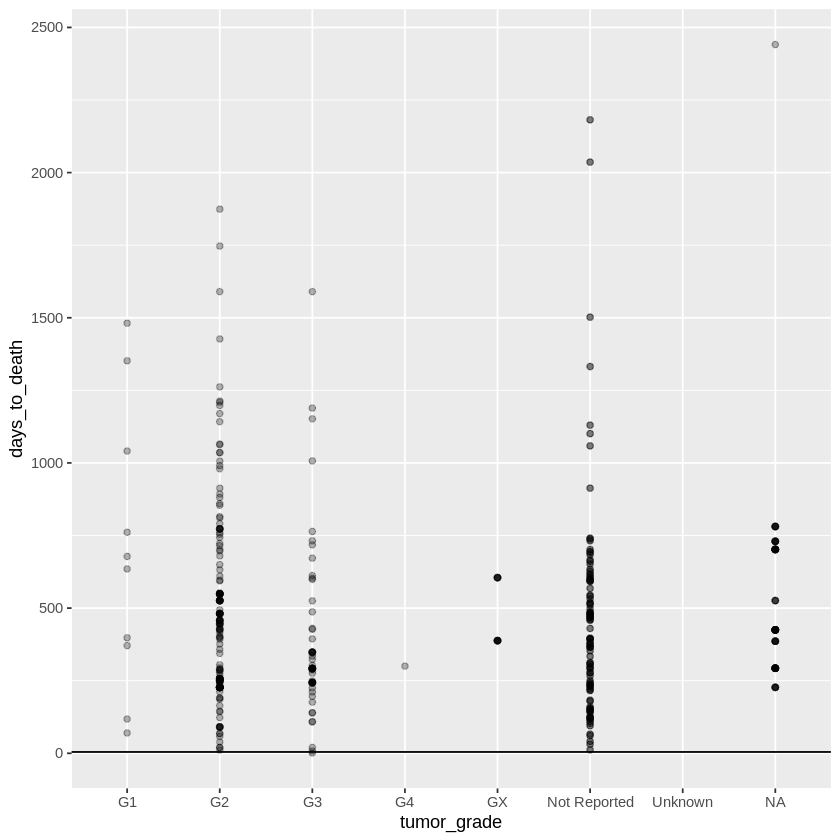

In [ ]:
ggplot(data = data, aes(x = tumor_grade, y = days_to_death)) +
  geom_point(alpha = 0.3) +
  geom_abline(slope = data_glm$coefficients[2], intercept = data_glm$coefficients[1]) +
  geom_smooth()

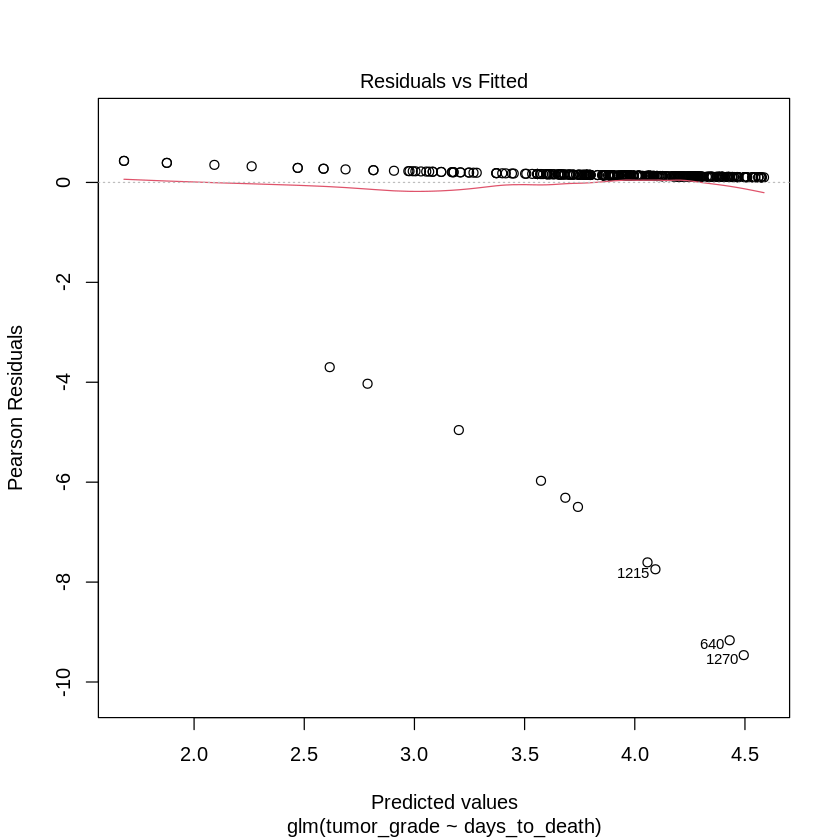

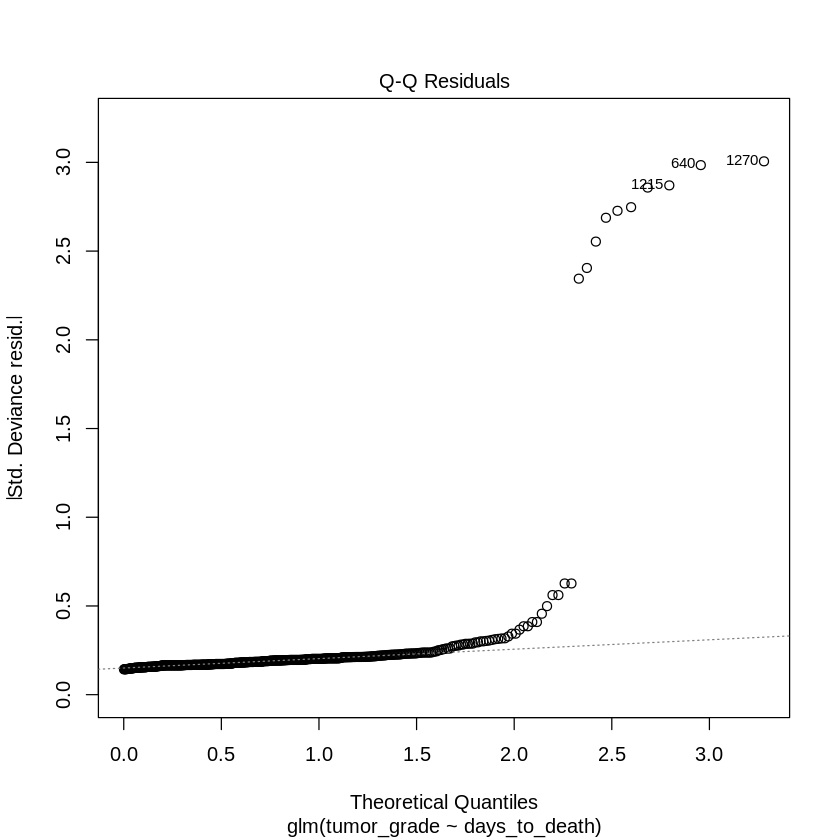

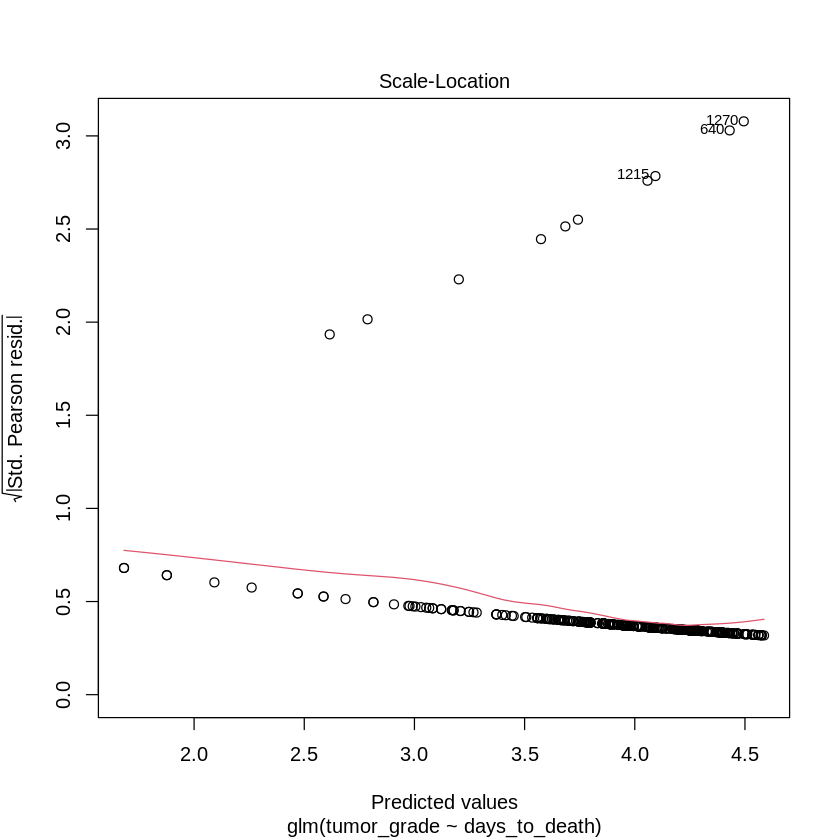

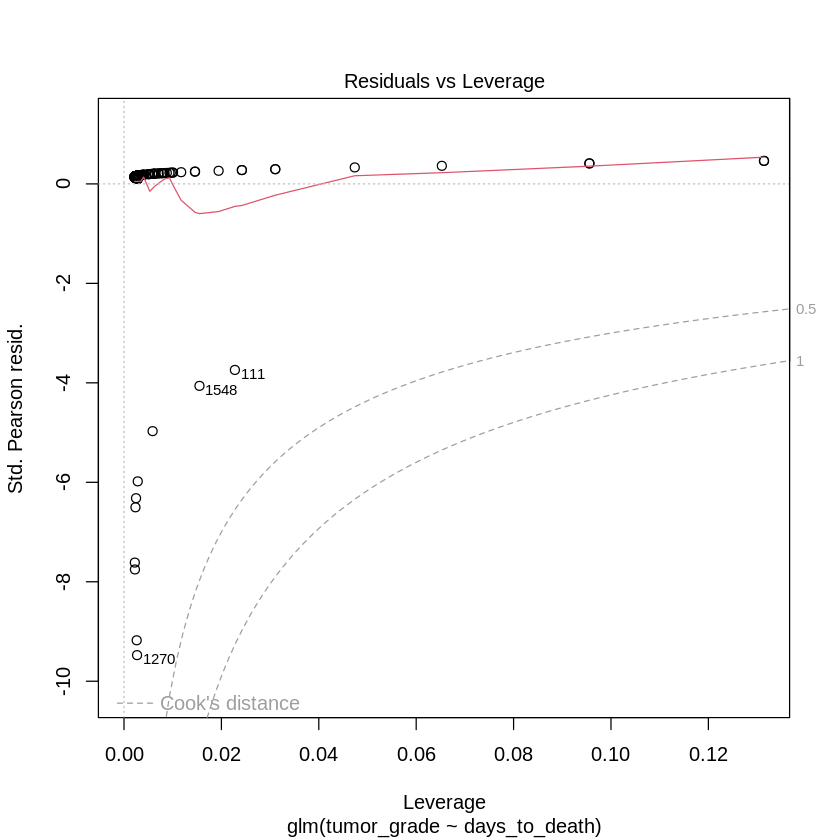

In [ ]:
plot(data_glm)

## Пуассоновская регрессия

Гипотеза: влияет ли степень злокачественности опухоли на количество дней до сметрти?

H0 - степень злокачественности опухоли не влияет на количество дней до сметрти.

H1 - степень злокачественности опухоли влияет на количество дней до сметрти.

ЗП - days_to_death - дискретная (разбили по группам, посчитали количество)

НП - tumor_grade - категориальная

In [ ]:
# создаем группы
data <- data %>%
  mutate(days_to_death_group = factor(case_when(days_to_death <= 250 ~ '1',
                               days_to_death <= 500 ~ '2',
                               days_to_death <= 750 ~ '3',
                               .default = '4')),
         count = sample(x = 1:1787, size  = nrow(data)))

In [ ]:
data %>%
  group_by(days_to_death_group) %>%
  summarise(mean_count = mean(count))

days_to_death_group,mean_count
<fct>,<dbl>
1,922.9038
2,888.3952
3,959.0602
4,884.6949


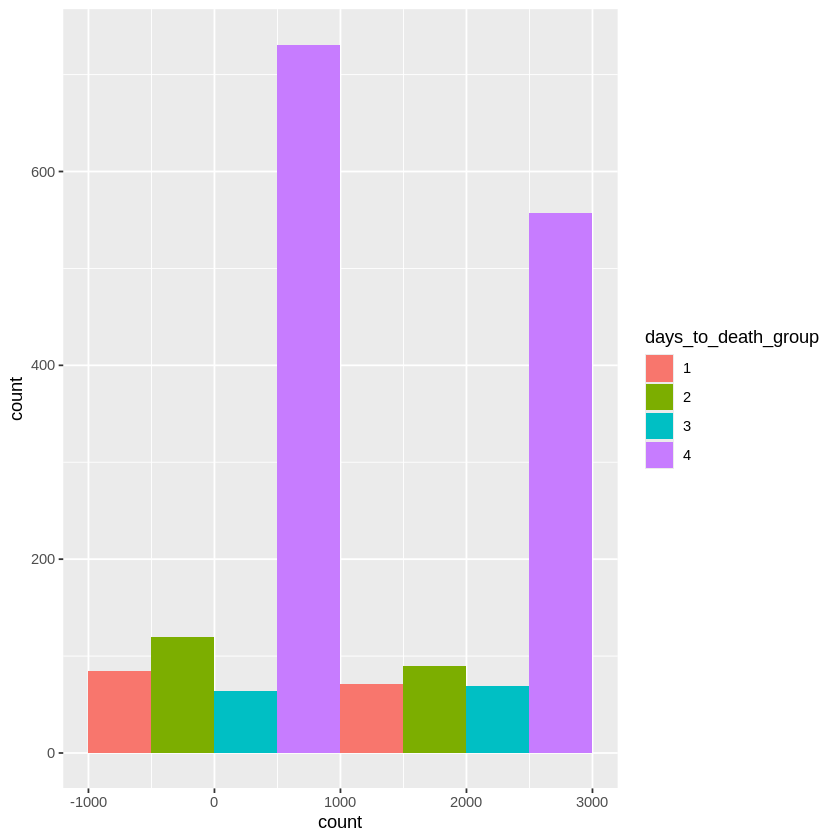

In [ ]:
ggplot(data, aes(count, fill = days_to_death_group)) +
  geom_histogram(binwidth = 2000, position = "dodge")

In [ ]:
model <- glm(count ~ days_to_death_group + tumor_grade, family = "poisson" ,
             data = data)

In [ ]:
summary(model)


Call:
glm(formula = count ~ days_to_death_group + tumor_grade, family = "poisson", 
    data = data)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              6.782727   0.008726 777.268  < 2e-16 ***
days_to_death_group2    -0.075696   0.003769 -20.081  < 2e-16 ***
days_to_death_group3     0.022554   0.004152   5.432 5.57e-08 ***
days_to_death_group4    -0.061895   0.002932 -21.107  < 2e-16 ***
tumor_gradeG2            0.061351   0.008551   7.175 7.24e-13 ***
tumor_gradeG3            0.050797   0.008919   5.695 1.23e-08 ***
tumor_gradeG4           -1.030277   0.059168 -17.413  < 2e-16 ***
tumor_gradeGX           -0.093713   0.010807  -8.671  < 2e-16 ***
tumor_gradeNot Reported  0.062904   0.008423   7.468 8.15e-14 ***
tumor_gradeUnknown       0.067078   0.009296   7.216 5.37e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 577048  on 16

есть зависимость переменных при включении фактора tumor_grade

AIC: 588146

отвергаем нулевую гипотезу


# Анализ выживаемости

Чистка колонки vital_status

In [ ]:
data <- data[data$vital_status %in% c('Dead', 'Alive'), ]

Создание колонок цензурирования и времени.

In [ ]:
data$time <- with (data, ifelse(vital_status == "Alive", days_to_last_follow_up, days_to_death))
# если пациент жив, в колонке time будет количество дней до последнего наблюдения,
#если пациент мертв - количество дней до смерти

In [ ]:
data$status <- with (data, ifelse(days_to_death == days_to_last_follow_up | days_to_last_follow_up == 0, 0, 1))
# status = 0 -> цензурирование (количество дней до смерти = количеству дней до последнего наблюдения или days_to_last_follow_up=0)
# status = 1 -> смерть (количество дней до смерти != количеству дней до последнего наблюдения)

In [ ]:
data <- data %>%
    mutate(status = as.factor(status))

## Метод Каплана-Майера

In [ ]:
install.packages('survival')
library(survival)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# рассчитанное время до события
Surv(data$time, data$status)[1:10]

 [1] 486?  486?  697:1  NA?   NA?   NA?   NA?   NA?   NA?   NA? 

In [ ]:
# кривая Каплана-Майера
s1 <- survfit(Surv(time, status==1) ~ 1, data = data)
str(s1)

List of 17
 $ n        : int 198
 $ time     : num [1:150] 0 1 8 11 20 39 58 68 70 88 ...
 $ n.risk   : num [1:150] 198 195 194 193 192 189 188 187 185 184 ...
 $ n.event  : num [1:150] 0 0 0 0 1 1 0 0 0 0 ...
 $ n.censor : num [1:150] 3 1 1 1 2 0 1 2 1 1 ...
 $ surv     : num [1:150] 1 1 1 1 0.995 ...
 $ std.err  : num [1:150] 0 0 0 0 0.00522 ...
 $ cumhaz   : num [1:150] 0 0 0 0 0.00521 ...
 $ std.chaz : num [1:150] 0 0 0 0 0.00521 ...
 $ type     : chr "right"
 $ logse    : logi TRUE
 $ conf.int : num 0.95
 $ conf.type: chr "log"
 $ lower    : num [1:150] 1 1 1 1 0.985 ...
 $ upper    : num [1:150] 1 1 1 1 1 1 1 1 1 1 ...
 $ na.action: 'omit' Named int [1:746] 1 2 4 5 6 7 8 9 10 11 ...
  ..- attr(*, "names")= chr [1:746] "1" "2" "4" "5" ...
 $ call     : language survfit(formula = Surv(time, status == 1) ~ 1, data = data)
 - attr(*, "class")= chr "survfit"


In [ ]:
s1

Call: survfit(formula = Surv(time, status == 1) ~ 1, data = data)

   746 observations deleted due to missingness 
       n events median 0.95LCL 0.95UCL
[1,] 198    112    593     498     680

In [ ]:
install.packages("survminer")
library(survminer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




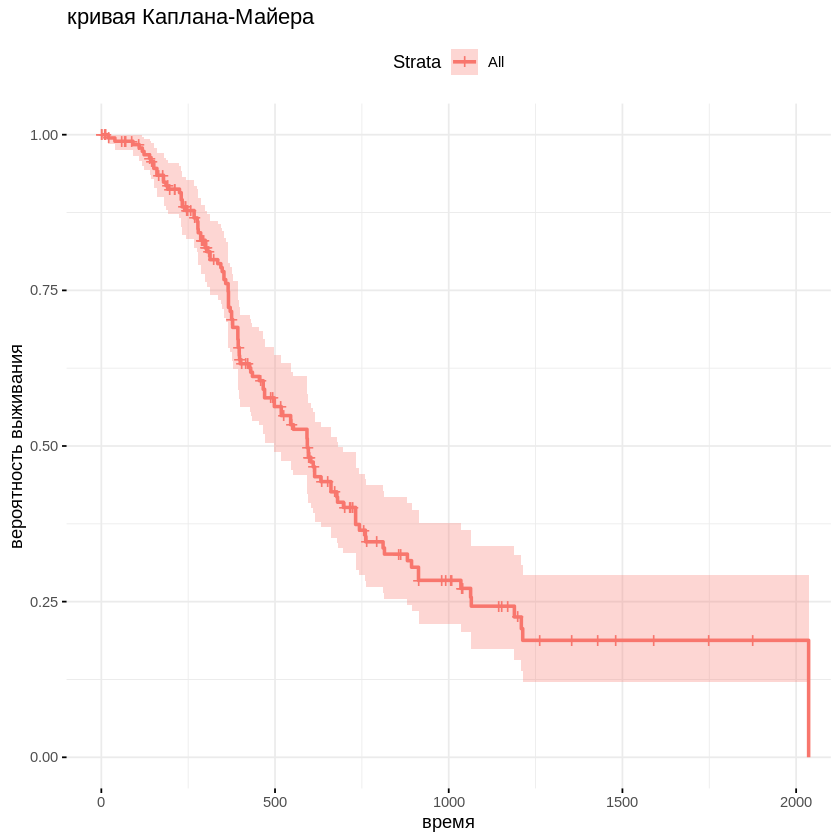

In [ ]:
# кривая Каплана-Майера

ggsurvplot(s1, data = data, Risk.table = TRUE, ggtheme = theme_minimal(), title = 'кривая Каплана-Майера', xlab = 'время', ylab = 'вероятность выживания')

In [ ]:
# выживаемость в точке 1 год = 74%
summary(s1, time = 365.25)

Call: survfit(formula = Surv(time, status == 1) ~ 1, data = data)

746 observations deleted due to missingness 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  365    117      43    0.748  0.0335        0.685        0.817

## Регрессия конкурирующих рисков

In [ ]:
crr(Surv(time, status) ~ gender + tumor_largest_dimension_diameter, data = data)

871 cases omitted due to missing values




── crr() ───────────────────────────────────────────────────────────────────────

• Call Surv(time, status) ~ gender + tumor_largest_dimension_diameter

• Failure type of interest "1"




Variable                           Coef     SE      HR     95% CI       p-value    
gendermale                         0.052    0.406   1.05   0.48, 2.33   0.90       
tumor_largest_dimension_diameter   -0.054   0.080   0.95   0.81, 1.11   0.50       

## Лонг-Ранг тест

In [ ]:
survdiff(Surv(time, status==1) ~ tumor_grade, data=data)

Call:
survdiff(formula = Surv(time, status == 1) ~ tumor_grade, data = data)

n=198, 746 observations deleted due to missingness.

                          N Observed Expected (O-E)^2/E (O-E)^2/V
tumor_grade=G1           10        5      8.1      1.19     1.303
tumor_grade=G2           82       34     54.2      7.55    15.501
tumor_grade=G3           35       11     16.2      1.66     1.967
tumor_grade=G4            1        0      0.2      0.20     0.202
tumor_grade=Not Reported 70       62     33.3     24.78    39.076

 Chisq= 39.2  on 4 degrees of freedom, p= 6e-08 

вероятность выживания по степени злокачественности опухоли

In [ ]:
fit <- survfit(Surv(time, status == 1) ~ tumor_grade, data=data)

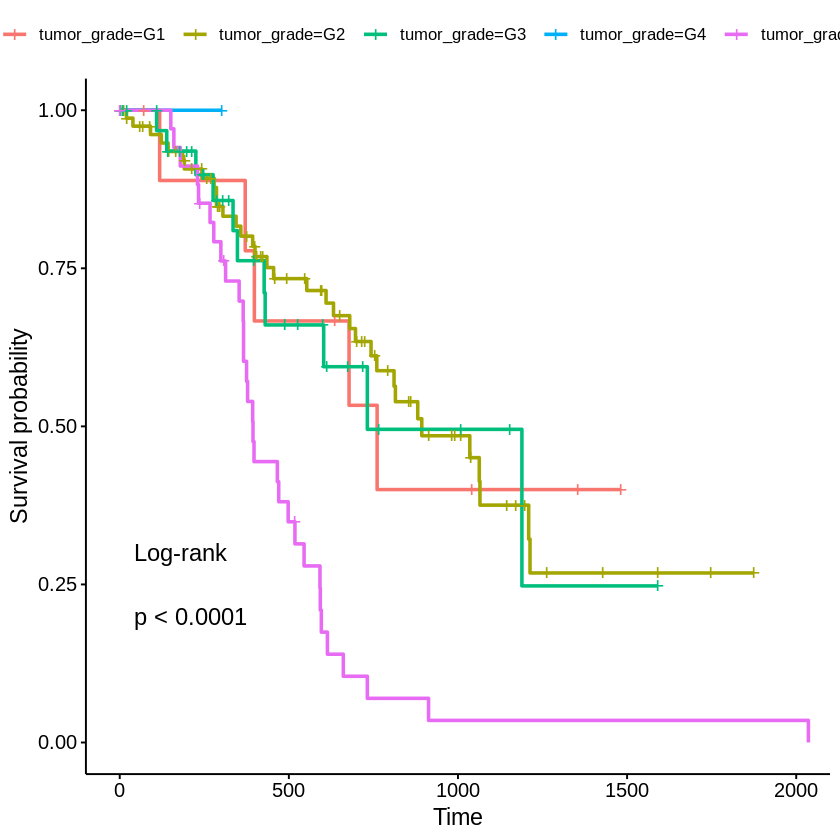

In [ ]:
survminer::ggsurvplot(fit, data = data,  pval = TRUE, pval.method = TRUE)

вероятность выживания у группы со степенью G2 выше

вероятность выживания по морфологии

In [ ]:
fit <- survfit(Surv(time, status==1) ~ morphology, data=data)

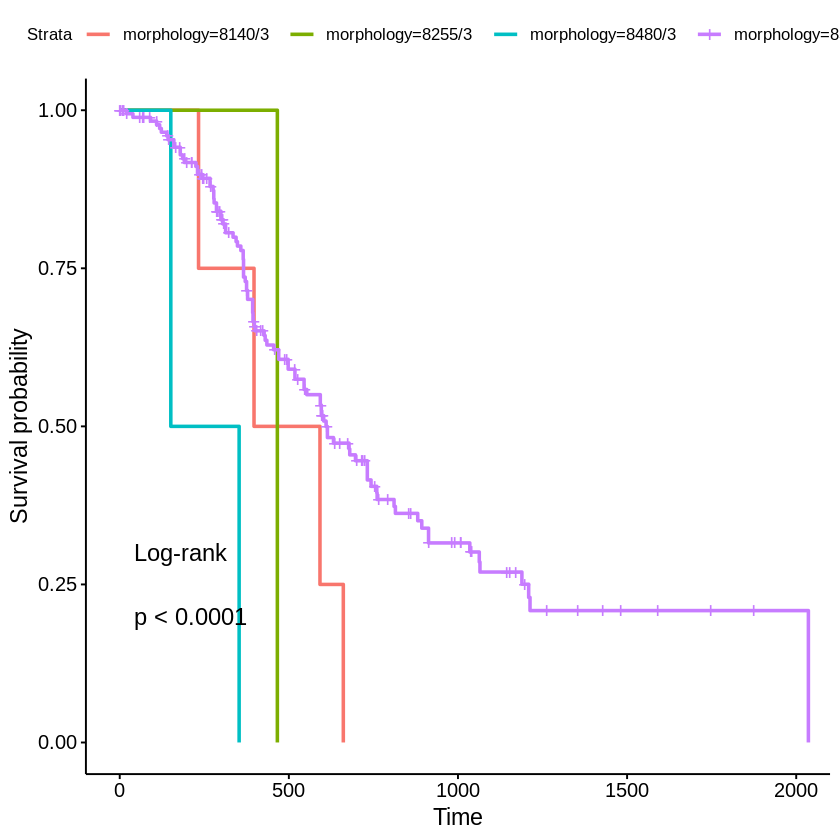

In [ ]:
survminer::ggsurvplot(fit, data = data,  pval = TRUE, pval.method = TRUE)

вероятность выживания по размерам (количеству) лимфотических узлов

In [ ]:
fit <- survfit(Surv(time, status==1) ~ lymph_nodes_positive, data=data)

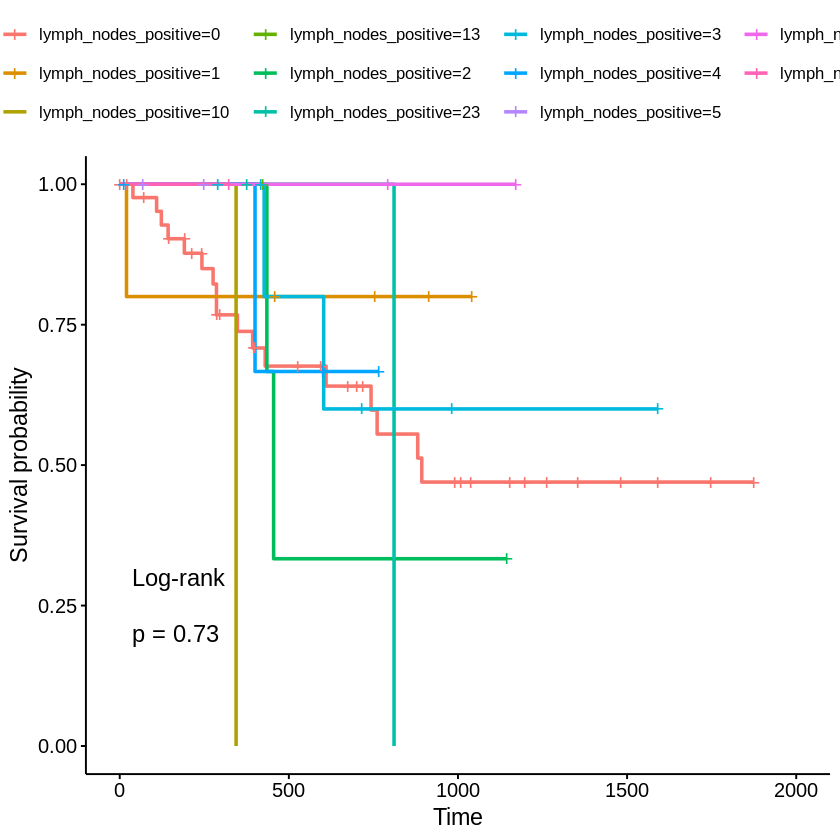

In [ ]:
survminer::ggsurvplot(fit, data = data,  pval = TRUE, pval.method = TRUE)

## Множественная группировка

In [ ]:
df <- data

In [ ]:
s3 <- survfit(Surv(time, status==1) ~ ethnicity + gender + race, data = df)

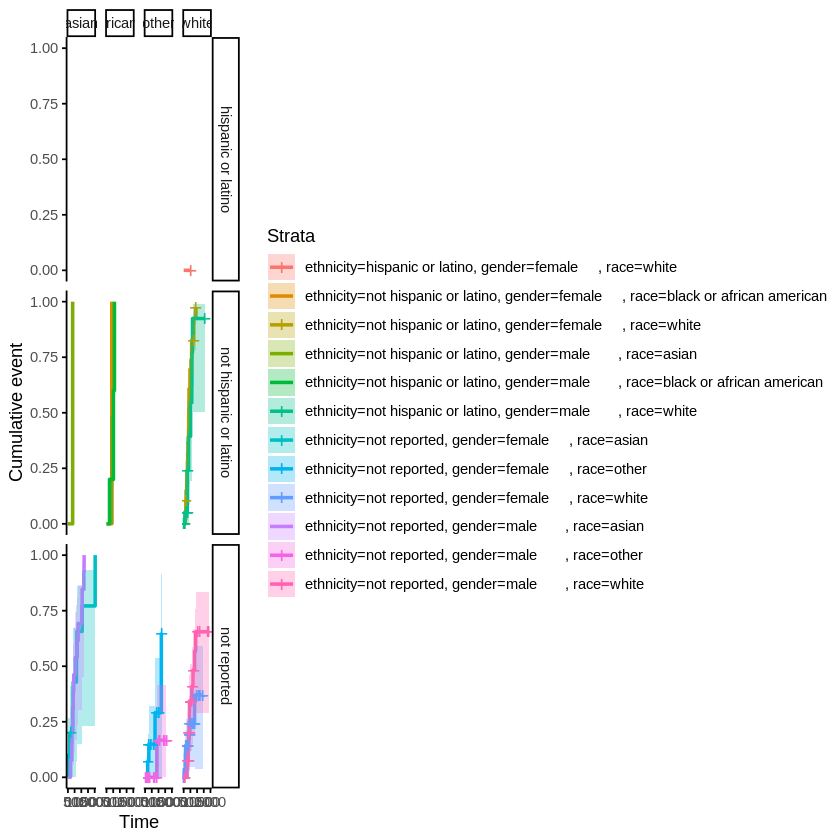

In [ ]:
# кумулята риска
ggsurv <- ggsurvplot(s3, fun = 'event', conf.int = TRUE, ggtheme = theme_classic())
ggsurv$plot + theme(legend.position = "right") + facet_grid(ethnicity ~ race)

вероятность выживания выше в группе мужчин, "белой" расы, не латиноамериканец